In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load CSV (replace with your dataset path)
df = pd.read_csv("D:/ML_project(2025)/IIoT_Smart_Parking_Management.csv")

# Quick look at data
print(df.head())
print(df.info())

                       Timestamp  Parking_Spot_ID  Sensor_Reading_Proximity  \
0  2021-01-01 00:00:00.000000000               20                  1.023651   
1  2021-01-02 06:39:16.756756756               49                  3.903349   
2  2021-01-03 13:18:33.513513513               38                 10.315709   
3  2021-01-04 19:57:50.270270270               31                  6.588039   
4  2021-01-06 02:37:07.027027027                8                  8.213969   

   Sensor_Reading_Pressure  Vehicle_Type_Weight  Vehicle_Type_Height  \
0                 1.541461          1831.770127             4.392528   
1                 1.621719          1330.815754             4.595638   
2                 6.292374          1255.134827             4.313721   
3                 1.659870          1523.442919             3.567329   
4                 3.278467          1758.490837             5.145836   

    User_Type  Weather_Temperature  Weather_Precipitation  \
0     Visitor            18.092

In [12]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract hour, day of week, weekend
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x>=5 else 0)


In [13]:
df['occupied'] = df['Occupancy_Status'].apply(lambda x: 1 if x=='Occupied' else 0)
print([col for col in df.columns if 'User_Type' in col or 'Vehicle_Type' in col or 'Nearby_Traffic_Level' in col])


['Vehicle_Type_Weight', 'Vehicle_Type_Height', 'User_Type_Staff', 'User_Type_Visitor', 'Vehicle_Type_Electric Vehicle', 'Vehicle_Type_Motorcycle', 'Nearby_Traffic_Level_Low', 'Nearby_Traffic_Level_Medium']


In [14]:
df['prev_occupancy'] = df.groupby('Parking_Spot_ID')['occupied'].shift(1).fillna(0)


In [15]:
features = [
    'hour', 'day_of_week', 'is_weekend',
    'Sensor_Reading_Proximity', 'Sensor_Reading_Pressure',
    'Vehicle_Type_Weight', 'Vehicle_Type_Height',
    'Weather_Temperature', 'Weather_Precipitation',
    'prev_occupancy',
    'User_Type_Staff', 'User_Type_Visitor',
    'Vehicle_Type_Electric Vehicle', 'Vehicle_Type_Motorcycle',
    'Nearby_Traffic_Level_Low', 'Nearby_Traffic_Level_Medium'
]

X = df[features]
y = df['occupied']


In [18]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Accuracy: 0.8090909090909091
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       115
           1       0.76      0.87      0.81       105

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220



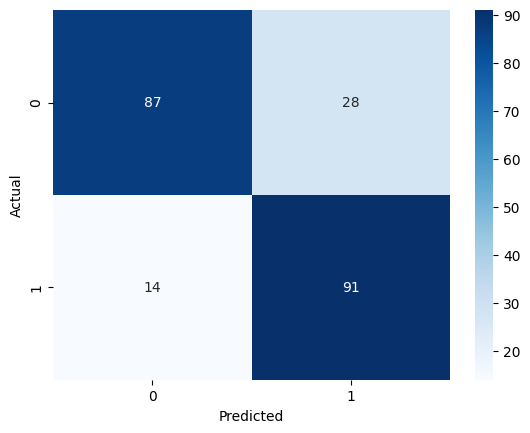

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
